# DQN

In [ ]:
# https://github.com/ageron/handson-ml/blob/master/16_reinforcement_learning.ipynb

In [1]:
import numpy as np
np.set_printoptions(suppress=True) 

from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True   # no problem, let's use OpenAI gym's rendering function
except Exception:
    openai_cart_pole_rendering = False  # probably no X server available, let's use our own rendering function

def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        # use OpenAI gym's rendering function
        return env.render(mode="rgb_array")
    else:
        # rendering for the cart pole environment (in case OpenAI gym can't do it)
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2 
        bg_col = (255, 255, 255)
        cart_col = 0x000000 # Blue Green Red
        pole_col = 0x669acc # Blue Green Red

        pos, vel, ang, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col) # draw cart
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w) # draw pole
        return np.array(img)

def plot_cart_pole(env, obs):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    img = render_cart_pole(env, obs)
    plt.imshow(img)
    #plt.axis("off")
    plt.show()

In [7]:
from __future__ import division, print_function, unicode_literals

import gym
import numpy as np
import os
import sys

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#PROJECT_ROOT_DIR = "."
#CHAPTER_ID = "rl"

#def save_fig(fig_id, tight_layout=True):
#    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
#    print("Saving figure", fig_id)
#    if tight_layout:
#        plt.tight_layout()
#    plt.savefig(path, format='png', dpi=300)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


<IPython.core.display.Javascript object>


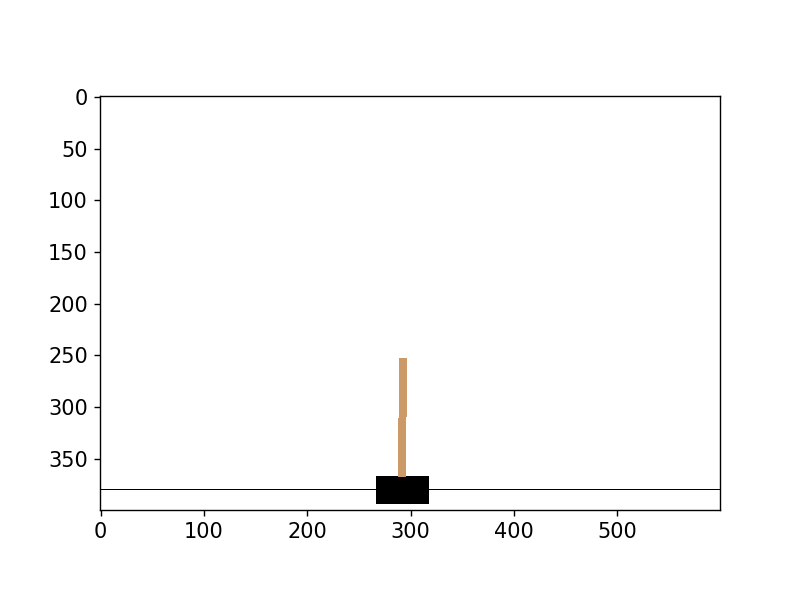

In [3]:
# 環境の読込と初期化
env = gym.make("CartPole-v0")

obs = env.reset()
action = env.action_space.sample()
obs, r, done, info = env.step(action)

plot_cart_pole(env, obs)

In [4]:
print('observation   : {}'.format(obs))  # 現在の状態 [position(カート位置), velocity(カート速度), angle(棒角度:0が垂直、0以上は右の傾き), angular_velocity(棒角速度)]
print('reward        : {}'.format(r))    # 現在の報酬 (棒の角度が20.9度以内かつ線の範囲内であれば1、それ以外は0)
print('done          : {}'.format(done)) # 終了状態かどうか
print('info          : {}'.format(info)) # デバック用の情報

# カート位置 -2.4～2.4
# カート速度 -3.0～3.0
# 棒角度 　-41.8～41.8
# 棒角速度　-2.0～2.0
# 棒が20.9度以上傾いたり、カート位置が±2.4以上移動すると失敗


observation   : [-0.02634311 -0.20285231  0.01457415  0.33678331]
reward        : 1.0
done          : False
info          : {}


In [5]:
# 取りうる行動の選択肢の数(カートを右または左に動かすためDiscreteは「2」となる.左:0、右:1)
env.action_space

Discrete(2)

In [6]:
# ポールの傾きが0以上になるようにカートを移動するように構成
# (右に傾いたら、カートを左に移動.それ以外なら左に移動)
# 表示結果 現在の状態 [position,velocity,angle,angular_velocity],現在の報酬,終了状態かどうか,デバック用の情報


frames = []
i = 0
n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    i += 1 
    img = render_cart_pole(env, obs)
    frames.append(img)

    position, velocity, angle, angular_velocity = obs
    if angle < 0:
        action = 0
    else:
        action = 1

    obs, reward, done, info = env.step(action)

    #print (obs, reward, done, info)
    print (('position: {: =+.8f}   velocity: {:=+.8f}   angle: {:=+.8f}   angular_velocity: {:=+.8f}').format(position, velocity, angle, angular_velocity))
    if done:
        break
        
print ("total steps:",i)

position: +0.01467935   velocity: +0.03539753   angle: +0.04003985   angular_velocity: +0.01799799
position: +0.01538731   velocity: +0.22992307   angle: +0.04039981   angular_velocity: -0.26178788
position: +0.01998577   velocity: +0.42444574   angle: +0.03516405   angular_velocity: -0.54145949
position: +0.02847468   velocity: +0.61905626   angle: +0.02433486   angular_velocity: -0.82285871
position: +0.04085581   velocity: +0.81383699   angle: +0.00787769   angular_velocity: -1.10778955
position: +0.05713255   velocity: +1.00885451   angle: -0.01427810   angular_velocity: -1.39799074
position: +0.07730964   velocity: +0.81391299   angle: -0.04223791   angular_velocity: -1.10980588
position: +0.09358790   velocity: +0.61937071   angle: -0.06443403   angular_velocity: -0.83066698
position: +0.10597531   velocity: +0.42518585   angle: -0.08104737   angular_velocity: -0.55892463
position: +0.11447903   velocity: +0.23128946   angle: -0.09222586   angular_velocity: -0.29283661
position: 

<IPython.core.display.Javascript object>


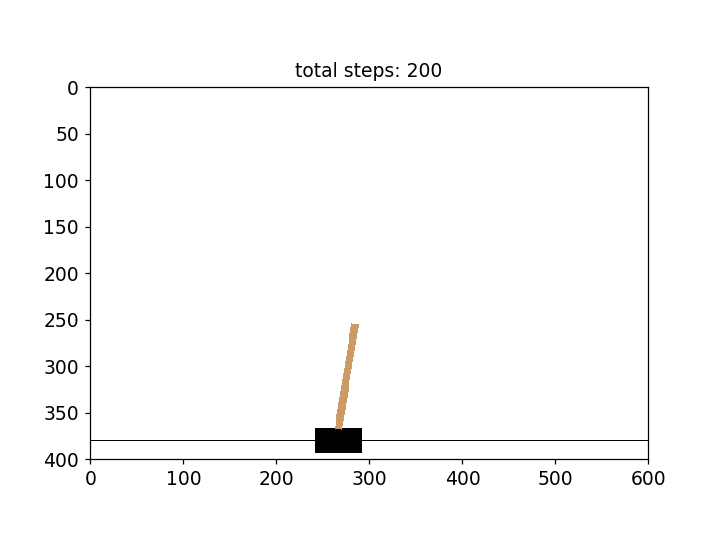

In [14]:
# ステップの可視化
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=50):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    #plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=repeat, interval=interval)

video = plot_animation(frames)
plt.title('total steps: {}'.format(i))
plt.show()

In [ ]:
video = plot_animation(frames)
plt.title('total steps: {}'.format(i))
plt.show()

In [ ]:
# DQN によるカートポールの制御

import tensorflow as tf

reset_graph()

n_inputs = 4
n_hidden = 4
n_outputs = 1

learning_rate = 0.01

initializer = tf.variance_scaling_initializer()

X = tf.placeholder(tf.float32, shape=[None, n_inputs])

hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu, kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs)
outputs = tf.nn.sigmoid(logits)  
p_left_and_right = tf.concat(axis=1, values=[outputs, 1 - outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

y = 1. - tf.to_float(action)
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(cross_entropy)
gradients = [grad for grad, variable in grads_and_vars]
gradient_placeholders = []
grads_and_vars_feed = []
for grad, variable in grads_and_vars:
    gradient_placeholder = tf.placeholder(tf.float32, shape=grad.get_shape())
    gradient_placeholders.append(gradient_placeholder)
    grads_and_vars_feed.append((gradient_placeholder, variable))
training_op = optimizer.apply_gradients(grads_and_vars_feed)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
def discount_rewards (rewards, discount_rate):
    discounted_rewards = np.zeros(len(rewards))
    cumulative_rewards = 0
    for step in reversed(range(len(rewards))):
        cumulative_rewards = rewards[step] + cumulative_rewards * discount_rate
        discounted_rewards[step] = cumulative_rewards
    return discounted_rewards

def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate) for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean)/reward_std for discounted_rewards in all_discounted_rewards]

In [ ]:
env = gym.make("CartPole-v0")

n_games_per_update = 10
n_max_steps = 1000
n_iterations = 10 #50
save_iterations = 20
discount_rate = 0.95

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        print("\rIteration: {}".format(iteration), end="")
        
        
        #print (len(current_rewards))
       #print (mean_gradients)
        print (step)
       # print (action_val,position)
        print (obs[0])
        
        all_rewards = []
        all_gradients = []
        for game in range(n_games_per_update):
            current_rewards = []
            current_gradients = []
            obs = env.reset()
            for step in range(n_max_steps):
                action_val, gradients_val = sess.run([action, gradients], feed_dict={X: obs.reshape(1, n_inputs)})
                obs, reward, done, info = env.step(action_val[0][0])
                current_rewards.append(reward)
                current_gradients.append(gradients_val)
                if done:
                    break
            all_rewards.append(current_rewards)
            all_gradients.append(current_gradients)

        all_rewards = discount_and_normalize_rewards(all_rewards, discount_rate=discount_rate)
        feed_dict = {}
        for var_index, gradient_placeholder in enumerate(gradient_placeholders):
            mean_gradients = np.mean([reward * all_gradients[game_index][step][var_index]
                                      for game_index, rewards in enumerate(all_rewards)
                                          for step, reward in enumerate(rewards)], axis=0)
            feed_dict[gradient_placeholder] = mean_gradients
        sess.run(training_op, feed_dict=feed_dict)
        if iteration % save_iterations == 0:
            saver.save(sess, "./DQN.ckpt")
env.close()
print ("  total steps:",step)

In [ ]:
video = plot_animation(frames)
plt.title('total steps: {}'.format(step))
plt.show()

In [ ]:
# カーネルリセット&GPUメモリ解放
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()

In [ ]:
env

In [ ]:
#-----------------------------------------------
!pip install keras-rl

In [ ]:
import numpy as np
import gym
from gym import wrappers # 追加

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory
#from rl.policy import dqn

ENV_NAME = 'CartPole-v0'

# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
#env = wrappers.Monitor(env, './CartPole', force=True) #　追加
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=50000, window_length=1)

policy = BoltzmannQPolicy()



dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
#dqn.fit(env, nb_steps=50000, visualize=True, verbose=2)
dqn.fit(env, nb_steps=500, visualize=False, verbose=2)

# After training is done, we save the final weights.
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

# Finally, evaluate our algorithm for 5 episodes.
#dqn.test(env, nb_episodes=5, visualize=True)
#dqn.test(env, nb_episodes=5, visualize=False)

In [ ]:
obs

In [ ]:
#---------------------------------------------

In [2]:
import chainer
import chainer.functions as F
import chainer.links as L
import chainerrl
import gym
import numpy as np

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:


# Get the environment and extract the number of actions.
env = gym.make("CartPole-v0")

print("observation space   : {}".format(env.observation_space))
print("action space        : {}".format(env.action_space))
obs = env.reset() #初期化
#env.render()#レンダリングした環境を見せてくれる
print("initial observation : {}".format(obs))

action = env.action_space.sample()
obs, r, done, info = env.step(action)

### どんな値が入っているのか確認！
print('next observation    : {}'.format(obs))
print('reward              : {}'.format(r))
print('done                : {}'.format(done))
print('info                : {}'.format(info))

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
observation space   : Box(4,)
action space        : Discrete(2)
initial observation : [-0.03333902 -0.00714254  0.03856829  0.00692316]
next observation    : [-0.03348187  0.18740567  0.03870675 -0.27334587]
reward              : 1.0
done                : False
info                : {}


<IPython.core.display.Javascript object>


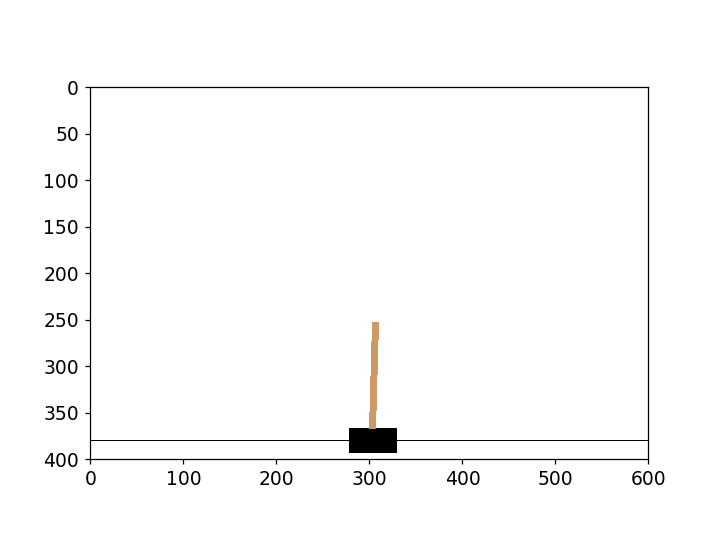

In [8]:
plot_cart_pole(env, obs)

In [9]:
class QFunction(chainer.Chain):
    def __init__(self, obs_size, n_actions, n_hidden_channels=50):
        #super(QFunction, self).__init__(##python2.x用
        super().__init__(#python3.x用
            l0=L.Linear(obs_size, n_hidden_channels),
            l1=L.Linear(n_hidden_channels,n_hidden_channels),
            l2=L.Linear(n_hidden_channels, n_actions))
        
    def __call__(self, x, test=False): 
        """
        x ; 観測#ここの観測って、stateとaction両方？
        test : テストモードかどうかのフラグ
        """
        h = F.tanh(self.l0(x)) #活性化関数は自分で書くの？
        h = F.tanh(self.l1(h))
        return chainerrl.action_value.DiscreteActionValue(self.l2(h))

obs_size = env.observation_space.shape[0]
n_actions = env.action_space.n
q_func = QFunction(obs_size, n_actions)
# q_func.to_gpu(0) ## GPUを使いたい人はこのコメントを外す

In [ ]:
_q_func = chainerrl.q_functions.FCStateQFunctionWithDiscreteAction(
    obs_size, n_actions,
    n_hidden_layers=2, n_hidden_channels=50)

In [10]:
optimizer = chainer.optimizers.Adam(eps=1e-2)
optimizer.setup(q_func) #設計したq関数の最適化にAdamを使う
gamma = 0.95
explorer = chainerrl.explorers.ConstantEpsilonGreedy(
    epsilon=0.3, random_action_func=env.action_space.sample)
replay_buffer = chainerrl.replay_buffer.ReplayBuffer(capacity = 10**6)
phi = lambda x:x.astype(np.float32, copy=False)##型の変換(chainerはfloat32型。float64は駄目)

agent = chainerrl.agents.DoubleDQN(
    q_func, optimizer, replay_buffer, gamma, explorer,
    replay_start_size=500, 
     phi=phi)

In [11]:
frames = []

import time
n_episodes = 200
max_episode_len = 200
start = time.time()
for i in range(1, n_episodes + 1):
    obs = env.reset()
    reward = 0
    done = False
    R = 0  # return (sum of rewards)
    t = 0  # time step
    while not done and t < max_episode_len:
        # 動きを見たければここのコメントを外す
        # env.render()
        action = agent.act_and_train(obs, reward)
        obs, reward, done, _ = env.step(action)
        R += reward
        t += 1
        
        
        img = render_cart_pole(env, obs)
        frames.append(img)
        
    if i % 10 == 0:
        print('episode:', i,
              'R:', R,
              'statistics:', agent.get_statistics())
    agent.stop_episode_and_train(obs, reward, done)
print('Finished, elapsed time : {}'.format(time.time()-start))

episode: 10 R: 82.0 statistics: [('average_q', 0.2490360833302839), ('average_loss', 0.05241918932258305)]
episode: 20 R: 17.0 statistics: [('average_q', 0.37610449233522), ('average_loss', 0.016664067982370714)]
episode: 30 R: 9.0 statistics: [('average_q', 0.46032536396648366), ('average_loss', 0.01242385341837806)]
episode: 40 R: 21.0 statistics: [('average_q', 0.5588535424540089), ('average_loss', 0.012709473696845067)]
episode: 50 R: 40.0 statistics: [('average_q', 0.6279349758335464), ('average_loss', 0.014843374603913597)]
episode: 60 R: 8.0 statistics: [('average_q', 0.6720532205503346), ('average_loss', 0.016195420198008636)]
episode: 70 R: 18.0 statistics: [('average_q', 0.7165010692157993), ('average_loss', 0.016391827363013534)]
episode: 80 R: 15.0 statistics: [('average_q', 0.7426902844331964), ('average_loss', 0.017881974424947034)]
episode: 90 R: 15.0 statistics: [('average_q', 0.7635844660952946), ('average_loss', 0.018728491797770922)]
episode: 100 R: 8.0 statistics: [

<IPython.core.display.Javascript object>


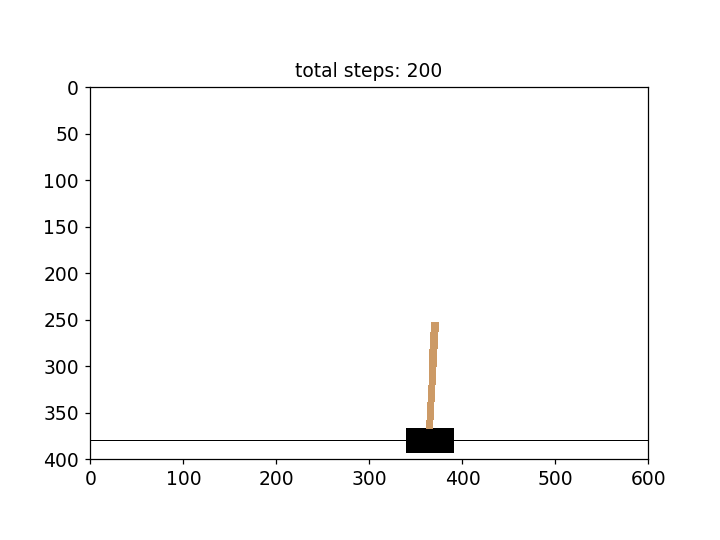

In [15]:
#plot_cart_pole(env, obs)
video = plot_animation(frames)
plt.title('total steps: {}'.format(i))
plt.show()

In [16]:
for i in range(10):
    obs = env.reset()
    done = False
    R = 0
    t = 0
    while not done and t < 200:
        # env.render()
        action = agent.act(obs)
        obs, r, done, _ = env.step(action)
        R += r
        t += 1
        
        img = render_cart_pole(env, obs)
        frames.append(img)
    print('test episode:', i, 'R:', R)
    agent.stop_episode()

test episode: 0 R: 19.0
test episode: 1 R: 9.0
test episode: 2 R: 10.0
test episode: 3 R: 10.0
test episode: 4 R: 20.0
test episode: 5 R: 9.0
test episode: 6 R: 49.0
test episode: 7 R: 9.0
test episode: 8 R: 10.0
test episode: 9 R: 10.0


<IPython.core.display.Javascript object>


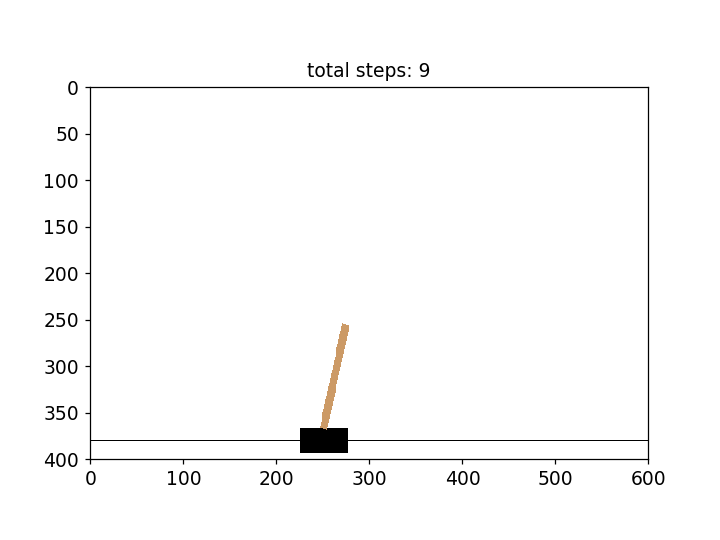

In [17]:
video = plot_animation(frames)
plt.title('total steps: {}'.format(i))
plt.show()


#agent.save("hoge")

In [18]:
chainerrl.experiments.train_agent_with_evaluation(
    agent, env,
    steps=2000,           # 2000step学習
    eval_n_runs=10,       #  評価(テスト)を10回する
    max_episode_len=1000,  # それぞれの評価に対する長さの最大(200s)
    #eval_frequency=1000,  # テストを1000stepの学習ごとに実施
    eval_interval=1000,
    outdir='chainerrl/result')      # 'result'フォルダに保存

In [ ]:
#q_func.to_gpu(-1)

<IPython.core.display.Javascript object>


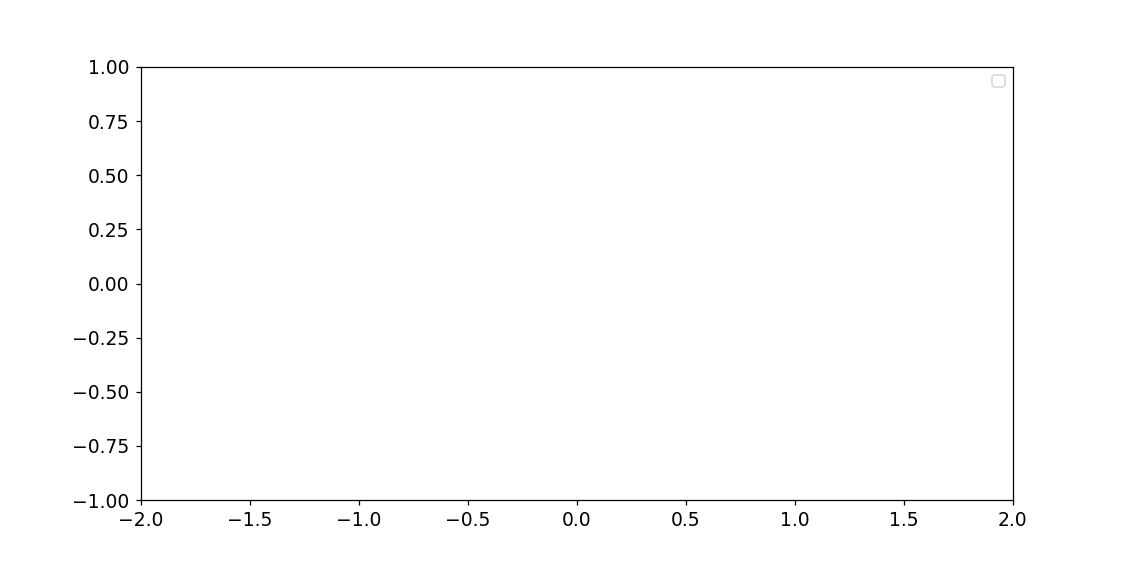

No handles with labels found to put in legend.


t:0 obs:[-0.02181702  0.01320249  0.02060049  0.03961333] action:1
t:1 obs:[-0.02155297  0.20802306  0.02139276 -0.24649941] action:1
t:2 obs:[-0.01739251  0.40283305  0.01646277 -0.53235854] action:1
t:3 obs:[-0.00933584  0.59771963  0.0058156  -0.81980896] action:1
t:4 obs:[ 0.00261855  0.79276151 -0.01058058 -1.11065706] action:1
t:5 obs:[ 0.01847378  0.98802086 -0.03279372 -1.40664032] action:1
t:6 obs:[ 0.0382342   1.18353411 -0.06092653 -1.70939214] action:1
t:7 obs:[ 0.06190488  1.37930099 -0.09511437 -2.02039893] action:1
t:8 obs:[ 0.0894909   1.57527126 -0.13552235 -2.34094715] action:1
t:9 obs:[ 0.12099632  1.77132888 -0.18234129 -2.67205879] action:1


(-1.0, 1.0)

In [23]:
import pylab as plt
import numpy as np
import matplotlib.animation as animation
fig = plt.figure(figsize=(10,5))
ims = []
frames = []
l = 1.0
obs = env.reset()
R,t,done = 0, 0, False
while not done and t < 200:
    action = agent.act(obs)
    print("t:{} obs:{} action:{}".format(t,obs,action))
    #im = plt.plot([-2,2],[0,0],color="black")
    #im = plt.plot([obs[1],obs[1]+l*np.sin(obs[3])],[0,l*np.cos(obs[3])],
    #              "o-",color="blue",lw=4,label="Pole")
    #ims.append(im)
    
    
    obs, r, done, _ = env.step(action)
    R += r
    t += 1
    
    img = render_cart_pole(env, obs)
    frames.append(img)
    #print("test episode : {} R: {}".format(i,R))
agent.stop_episode()
plt.legend()
plt.xlim(-2.0,2.0)
plt.ylim(-1.0,1.0)
#ani = animation.ArtistAnimation(fig, ims, interval=100)
#ani.save("animation.gif", writer="imagemagick")


<IPython.core.display.Javascript object>


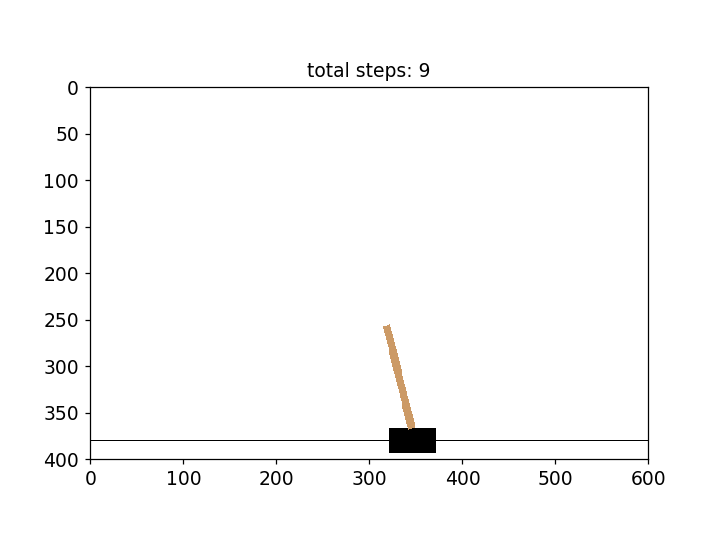

In [24]:
video = plot_animation(frames)
plt.title('total steps: {}'.format(i))
plt.show()
